<a href="https://colab.research.google.com/github/iankim20/webCrawling/blob/main/coronavirus_US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
%cd "/content/drive/My Drive/WhoSearchWhat"

/content/drive/My Drive/WhoSearchWhat


In [ ]:
%pip install pytrends

from pytrends.request import TrendReq
import pandas as pd
import numpy as np
from datetime import *
from time import sleep



In [ ]:
class("US")

SyntaxError: ignored

In [ ]:
def get_df(startdate, enddate, keyword):
  pass

def count_over_time(y1,m1,d1, y2,m2,d2, keyword, geograph):
  startdate = pd.Timestamp(y1,m1,d1).strftime("%Y-%m-%d")
  enddate = pd.Timestamp(y2,m2,d2).strftime("%Y-%m-%d")

  keyword_list = [keyword]
  print(geograph, type(geograph), type(geograph) != str)
  if type(geograph) != str:
    geograph = ""  

  pytrends = TrendReq(hl='en-US')
  timerange = startdate + ' ' + enddate
  pytrends.build_payload(keyword_list, timeframe = timerange, geo=geograph)
  data =  pytrends.interest_over_time()
  data = data[keyword_list]

  return data

# def count_by_region(y1,m1,d1, y2,m2,d2, keyword):
#   startdate = pd.Timestamp(y1,m1,d1).strftime("%Y-%m-%d")
#   enddate = pd.Timestamp(y2,m2,d2).strftime("%Y-%m-%d")

#  keyword_list = [keyword]

#   pytrends = TrendReq(hl='en-US')
#   timerange = startdate + ' ' + enddate
#   pytrends.build_payload(keyword_list, timeframe = timerange)
#   data =  pytrends.interest_by_region()
#   data = data[keyword_list]

#   return data

def count_by_region(date, keyword, geograph):
  startdate = date.strftime("%Y-%m-%d")
  # enddate = pd.Timestamp(y2,m2,d2).strftime("%Y-%m-%d")

  keyword_list = [keyword]
  if type(geograph) != str:
    geograph = ""

  pytrends = TrendReq(hl='en-US')
  timerange = startdate + ' ' + startdate
  pytrends.build_payload(keyword_list, timeframe = timerange, geo=geograph)
  data =  pytrends.interest_by_region(resolution="Region")
  data = data[keyword_list]

  return data


def count_sum_from(data,y,m,d):
  index = data.index >= pd.Timestamp(y,m,d)
  count_from = sum(data.iloc[index,0])

  return count_from

def count_sum_before(data,y,m,d):
  index = data.index <= pd.Timestamp(y,m,d)
  count_before = sum(data.iloc[index,0])

  return count_before

def count_sum_between(data,y1,m1,d1,y2,m2,d2):
  index = (data.index >= pd.Timestamp(y1,m1,d1)) & (data.index <= pd.Timestamp(y2,m2,d2))
  count_between = sum(data.iloc[index,0])

  return count_between




In [ ]:
#If needed to see whole rows of a dataframe

# pd.set_option('display.max_rows', 100)
# pd.set_option('display.max_rows', None)

In [ ]:
pytrends = TrendReq(hl='en-US')     
keyword = "coronavirus"

In [ ]:
# timerange = startdate + ' ' + enddate
# timerange
# pytrends.build_payload(keyword, timeframe = timerange)

data_total = count_over_time(2019,11,1,2020,11,3,keyword, "US")

data3 = count_over_time(2020,7,1,2020,11,3,keyword, "US")
from_3to_total = count_sum_from(data_total,2020,7,1)*7/count_sum_from(data3,2020,7,1)

data2 = count_over_time(2019,11,1,2020,6,30,keyword, "US")
from_2to_total = count_sum_before(data_total,2020,6,30)*7/count_sum_before(data2,2020,6,30)

data1 = count_over_time(2019,11,1,2020,1,21,keyword, "US")
from_1to_total = (count_sum_between(data2,2020,1,21,2020,1,21)/count_sum_between(data1,2020,1,21,2020,1,21)) * from_2to_total

data0 = count_over_time(2019,11,1,2020,1,11,keyword, "US")
from_0to_total = (count_sum_between(data1,2020,1,11,2020,1,11)/count_sum_between(data0,2020,1,11,2020,1,11)) * from_1to_total

data_reg = count_by_region(date(2020,11,8),keyword, "US")
region_list = data_reg.index.tolist()



0.00038143516351233866

In [ ]:
from random import randint
from time import sleep


list = pd.date_range(start="2019-11-1",end="2020-11-3").to_pydatetime().tolist()

In [ ]:
date = datetime(2019,11,25)

In [ ]:
total_dataframe = pd.DataFrame(columns=['state'])
total_dataframe['state']=region_list

count = 0 
key = 0
checkpoint = 0
sleeps = []
for i in range(len(list)):
  date = list[i]
  sleeptime = randint(1,123)/100
  colname = date.strftime("%Y-%m-%d")
  # print("sleeping for:", sleeptime, "seconds")

  df = count_by_region(date,keyword, "US")                      #특정 날의 전세계 데이터

  if sum(df.iloc[:,0]) == 0:
    key =1
    checkpoint = i

  if sum(df.iloc[:,0]) != 0:
    if date <= datetime(2020,1,11):
      df /= sum(df.iloc[:,0])                                       #그 날 내에서 각 국가의 검색수를 모든 국가합으로 나눈 것.
      df *= data0.at[colname,keyword]                         #각 날의 값의 곱해준다.
      df *= from_0to_total                                          #그 날의 값이 전체 timeframe 에서 나타내는 비율이 얼마인지 (위에서 '전체frame 합/국소 frame 합'으로 구한 것)
      
    elif (date > datetime(2020,1,11)) & (date <= datetime(2020,1,21)):
      sleeptime = randint(1,450)/100
      df /= sum(df.iloc[:,0])
      df *= data1.at[colname,keyword]    
      df *= from_1to_total

    elif (date > datetime(2020,1,21)) & (date <= datetime(2020,6,30)):
      df /= sum(df.iloc[:,0])
      df *= data2.at[colname,keyword]
      df *= from_2to_total
      
    elif (date > datetime(2020,6,30)) & (date <= datetime(2020,11,3)):
      sleeptime = randint(1,790)/100
      df /= sum(df.iloc[:,0])
      df *= data3.at[colname,keyword]
      df *= from_3to_total
    
    else:
      print("something's wrong")
    
    if key==1:
      ref_name = list[checkpoint-1].strftime("%Y-%m-%d")
      ref_day = total_dataframe[ref_name]
      fin_day = df.iloc[:,0].values
      wow = 1
      for id in range(checkpoint, i):
        delta = (fin_day - ref_day)/(i+1-checkpoint)
        col_name = list[id].strftime("%Y-%m-%d")
        total_dataframe[col_name]=ref_day + delta*wow
        wow += 1
      
      key=0

    
  mini_df = pd.DataFrame(df.iloc[:,0].tolist(),columns=[colname])
  

  if (count/50).is_integer():
    print("sleeping for:", sleeptime, "seconds")
    print("we are now at : ", date)
    print("sleeping is over")
  
  total_dataframe = pd.concat([total_dataframe,mini_df], axis=1)
  count+=1
  sleeps.append(sleeptime)

  sleep(sleeptime)
  # print("sleeping is over")



# pd.timedelta_range(pd.Timestamp(2020,11,1),pd.Timestamp(2020,11,3))

# pd.Timestamp(2020,11,8) - pd.Timestamep(2019,11,1)



In [ ]:
total_dataframe.to_csv('./coronavirus/US_20191101_20201103_ratio.csv', index=False)

In [ ]:
num = 22298937/(count_sum_before(data_total,2020,11,3)/12)

# https://app.kwfinder.com/dashboard?language_id=0&location_id=2840&query=coronavirus&source_id=0

In [ ]:
real_total = total_dataframe
real_total.iloc[:,1:len(total_dataframe.columns)] = total_dataframe.iloc[:,1:len(total_dataframe.columns)] * num


In [ ]:
cum_real_total = real_total

for i in range(len(total_dataframe.columns)-3):
  delta = cum_real_total.iloc[:,i+2]
  cum_real_total.iloc[:,i+2]=delta + cum_real_total.iloc[:,i+1]

cum_real_total.to_csv('./coronavirus/US_20191101_20201103_cum_real.csv', index=False)

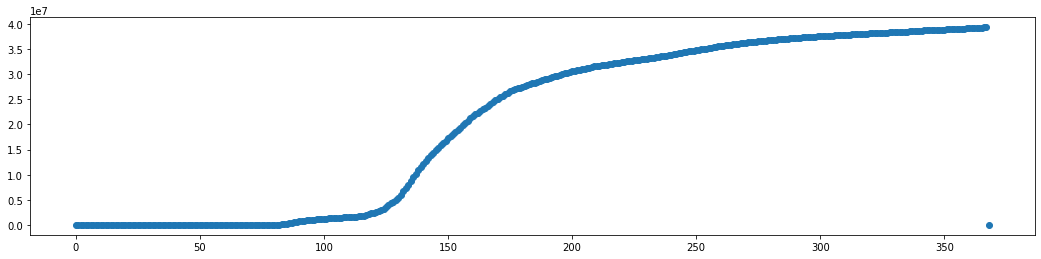

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,4))

plt.scatter(x=range(369), y=cum_real_total.iloc[20,1:])

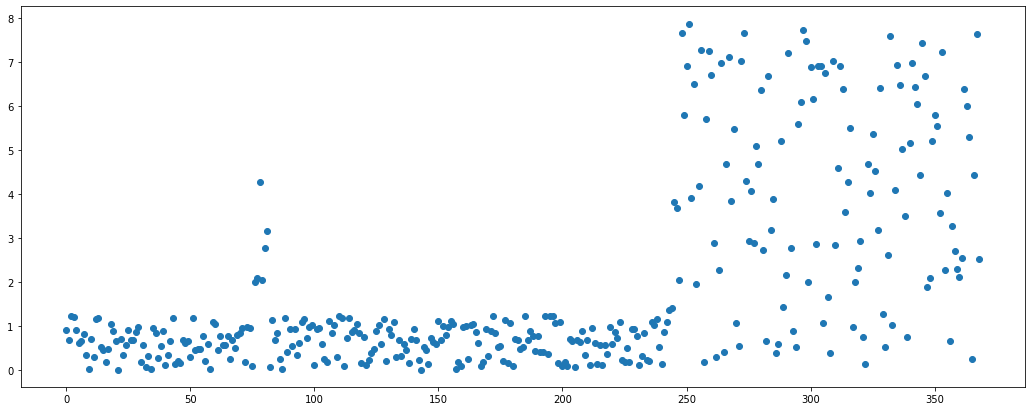

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(18,7))
plt.scatter(x=range(len(sleeps)), y=np.asarray(sleeps))